In [1]:
print(9)

9


In [42]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [43]:
data=[7,3,6,8,10,2,5,4,9,1,2,3,11,12,-10,-15,25,30,40,50]

In [44]:
x=np.sort(data)
print('sort data',x)

sort data [-15 -10   1   2   2   3   3   4   5   6   7   8   9  10  11  12  25  30
  40  50]


In [45]:
median_value=np.median(x)
print('median',median_value)

median 6.5


In [23]:
q1,q3=np.percentile(x,[25,75])

In [25]:
q1,q3

(2.75, 11.25)

In [29]:
iqr=q3-q1
print('IQR',iqr)

IQR 8.5


In [32]:
lower_bound= q1 - 1.5 * iqr
upper_bound=q1 + 1.5* iqr
print('lower_bound',lower_bound)
print('upper bound',upper_bound)

lower_bound -10.0
upper bound 15.5


In [36]:
outliers=[]
for i in x:
    if i<lower_bound or i > upper_bound:
        outliers.append(i)

In [39]:
 outliers=[val for val in x if val<lower_bound or val>upper_bound]

<AxesSubplot: >

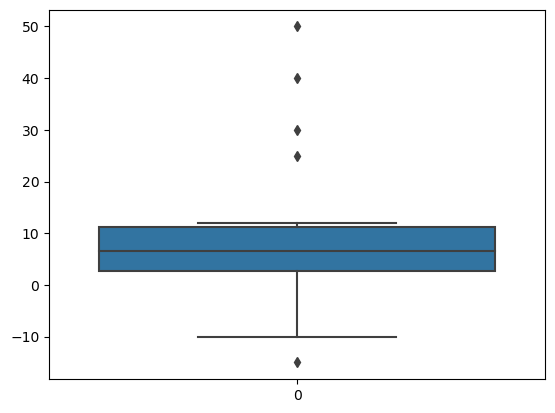

In [41]:
sns.boxplot(x)

In [48]:
from sklearn.datasets import load_iris

In [49]:
iris=load_iris()

In [52]:
iris=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [53]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [83]:
def remove_outliers(x):
    sorted_x=sorted(x)
    q1,q3=np.percentile(x,[25,75])
    iqr=q3-q1
    lower_bound=q1-1.5 * iqr
    upper_bound=q3 + 1.5 * iqr
    outliers=[val for val in x if val < lower_bound or val > upper_bound]
    new_x=[val for val in x if val >= lower_bound and val <= upper_bound]
    return new_x,outliers

In [84]:
new_sepal_length,outliers=remove_outliers(iris['sepal length (cm)'])

In [85]:
print('Number of removed outliers',len(outliers))
print('New length of sepal length ',len(new_sepal_length))

Number of removed outliers 0
New length of sepal length  150


In [86]:
new_sepal_width=remove_outliers(iris['sepal width (cm)'])

In [87]:
print('Number of removed outliers',len(outliers))
print('New length of sepal length ',len(pe))

Number of removed outliers 0


NameError: name 'pe' is not defined

In [88]:
titanic=sns.load_dataset('titanic')

In [89]:
titanic.shape

(891, 15)

In [93]:
new_age,outliers=remove_outliers(titanic['age'])

3

In [96]:
print('Number of removed outliers',len(outliers))
print('Number of age column',len(new_age))

Number of removed outliers 0
Number of age column 0


In [1]:
print(0)

0


In [2]:
import seaborn as sns 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [10]:
# Load the dataset 
df=sns.load_dataset('titanic')

In [11]:
df.shape

(891, 15)

In [12]:
df.isnull().sum()
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
# Normalize the data for min max scaling
def normalize(column):
    return (column -column.min())/(column.max() -column.min())

In [16]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
df['normalize_age']=normalize(df['age'])

In [20]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,normalize_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.271174
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.472229
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.321438
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.434531
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.434531


In [21]:
print(df['normalize_age'])

0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888         NaN
889    0.321438
890    0.396833
Name: normalize_age, Length: 891, dtype: float64


In [22]:
df['normalize_age'].isna().any().sum()

1

In [29]:
df['left_skewed']=df['normalize_age'] * 0.5 # multipling the factor less than 1 and making it a skewed data 

# create the right skewed with outliers
df['right_skewed']=df['normalize_age']  * 2

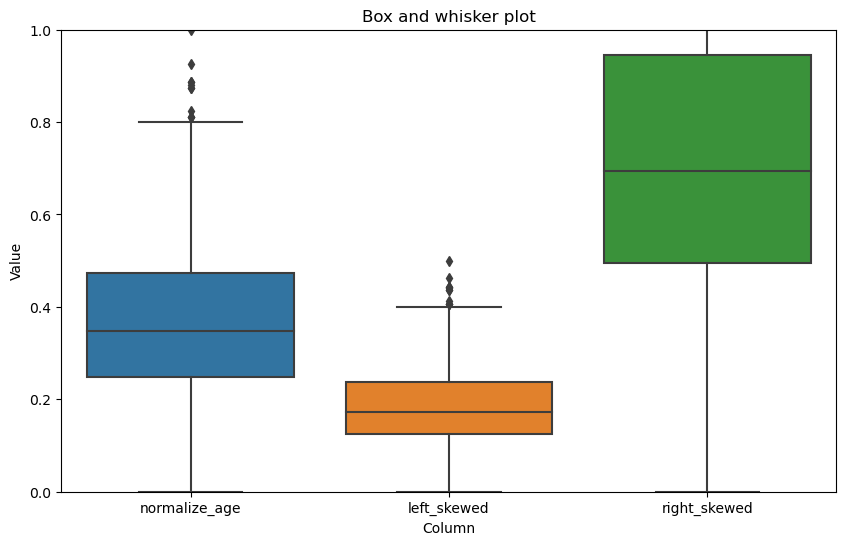

In [30]:
# plot the box -plot 
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['normalize_age','left_skewed','right_skewed']])
plt.ylim(0,1)
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Box and whisker plot')
plt.show()

# Example of skewness -2

In [31]:
df=sns.load_dataset('titanic')

In [32]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
df['normalized_age']=normalize(df['age'])

In [34]:
# Create the left skewed column with outliers 
df['left_skewed']=df['normalized_age'] - 0.2
df.loc[df['left_skewed'] < 0.2 , 'left_skewed']=0.5

In [35]:
df['right_skewed']=df['normalized_age'] + 0.2
df.loc[df['right_skewed'] < 0.2 , 'right_skewed']+=0.5

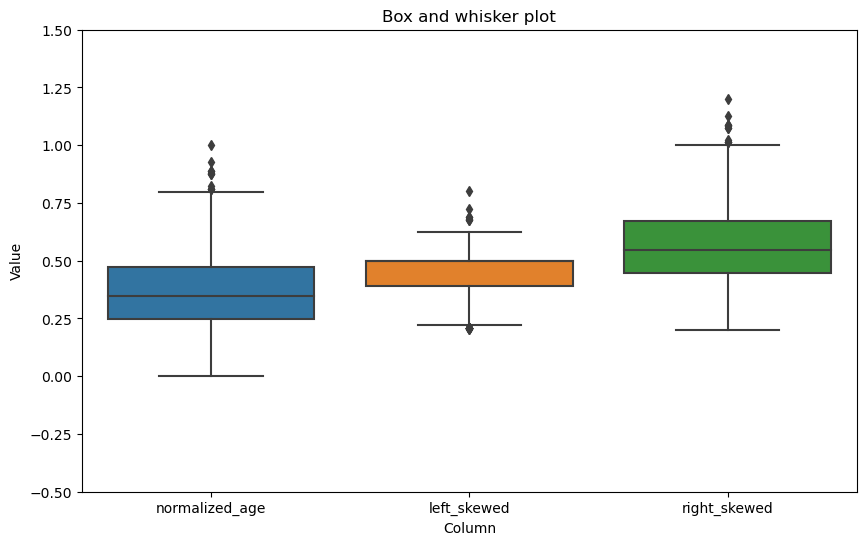

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['normalized_age','left_skewed','right_skewed']])
plt.ylim(-0.5,1.5)
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Box and whisker plot')
plt.show()

# Example 3 of skeness

In [38]:
df=sns.load_dataset('titanic')
df['normalize_age']=normalize(df['age'])

In [40]:
df=sns.load_dataset('iris')

def normalize(column):
    return (column -column.min())/(column.max() -column.min())

In [41]:
df['normalize_sepal_width']=normalize(df['sepal_width'])

In [45]:
# Create the left skewed data with outliers 
left_skewed_data=np.random.normal(loc= -0.2, scale=0.05 , size=len(df))
right_skewed_data=np.random.normal(loc= 0.2, scale=0.05 , size=len(df))

In [46]:
df['left_skewed']=df['normalize_sepal_width'] -left_skewed_data

df['right_skewed']=df['normalize_sepal_width'] + right_skewed_data

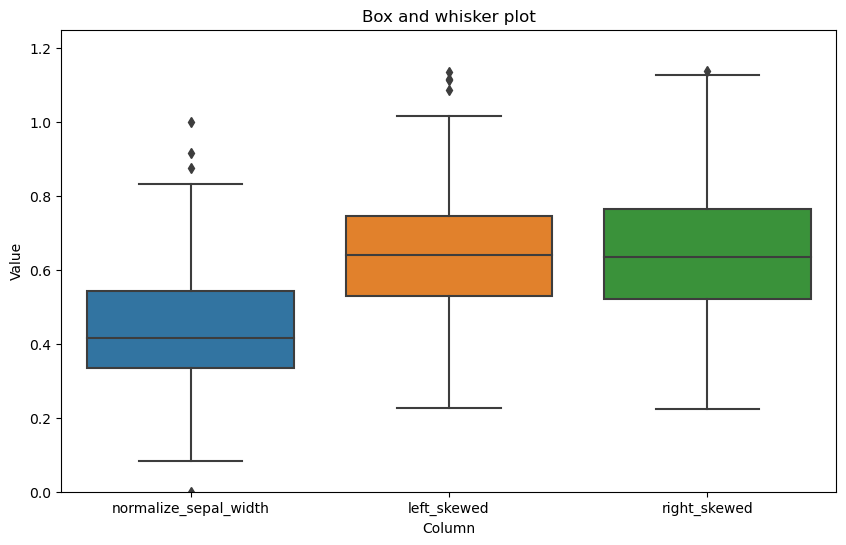

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['normalize_sepal_width','left_skewed','right_skewed']])
plt.ylim(0,1.25)
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Box and whisker plot')
plt.show()

# Kurtosis

## Example 1

In [54]:
df=sns.load_dataset('iris')

def normalize(column):
    return (column -column.min())/(column.max() -column.min())

iris_normalized=normalize(df['sepal_length'])

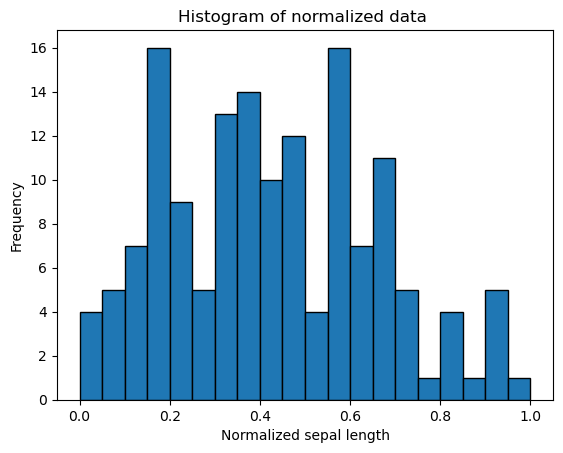

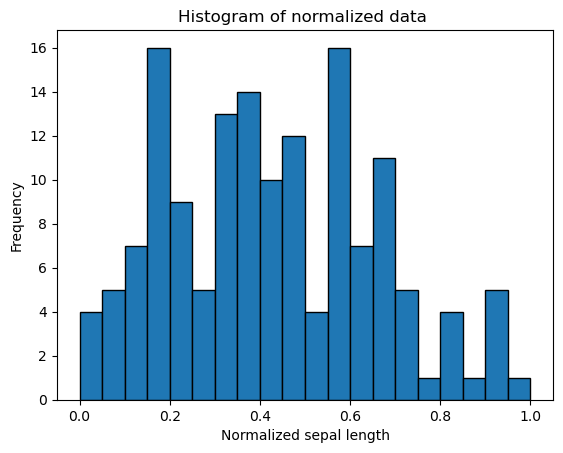

In [64]:
plt.hist(iris_normalized,bins=20,edgecolor='black')
plt.xlabel('Normalized sepal length')
plt.ylabel('Frequency')
plt.title('Histogram of normalized data ')
plt.show()

# Plot histogram with kurtosis greater than 3 
low_kurtosis_data=(df['sepal_length']-df['sepal_length'].mean())/5
plt.hist(iris_normalized,bins=20,edgecolor='black')
plt.xlabel('Normalized sepal length')
plt.ylabel('Frequency')
plt.title('Histogram of normalized data ')
plt.show()


In [65]:
# kurtosos Example 2
df=sns.load_dataset('iris')

In [66]:
sepal_length=df['sepal_length']

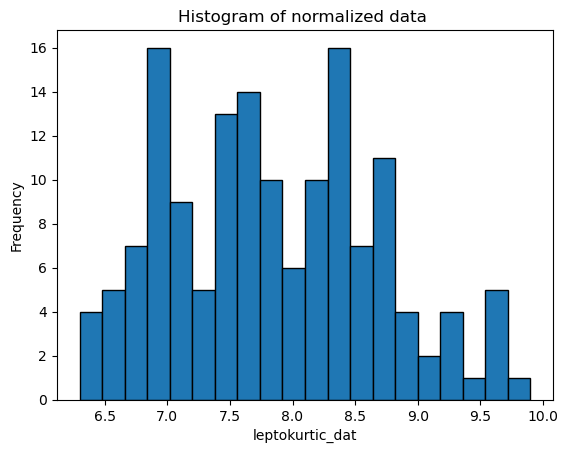

In [67]:
leptokurtic_dat=sepal_length + 2

plt.hist(leptokurtic_dat,bins=20,edgecolor='black')
plt.xlabel('leptokurtic_dat')
plt.ylabel('Frequency')
plt.title('Histogram of normalized data ')
plt.show()


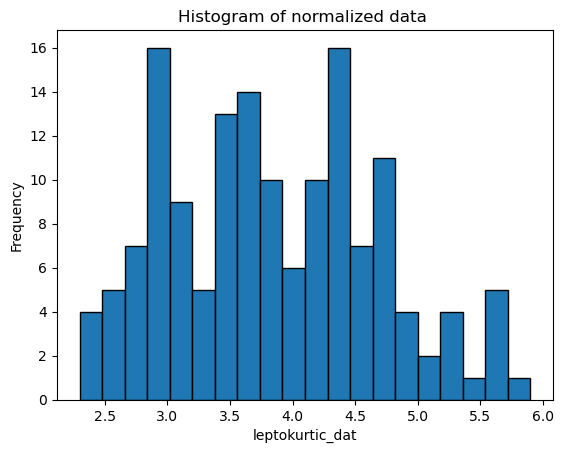

In [68]:
leptokurtic_dat=sepal_length - 2

plt.hist(leptokurtic_dat,bins=20,edgecolor='black')
plt.xlabel('leptokurtic_dat')
plt.ylabel('Frequency')
plt.title('Histogram of normalized data ')
plt.show()